In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import missingno as msno
import numpy as np

In [54]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

数据基本信息

In [55]:
df = pd.read_csv("sale.csv", encoding="utf-8")
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,2020-04-24 11:50:39 UTC,2294359932054530000,1515966223509080000,2268105426648170000,electronics.tablet,brand_1,162.01,1515915625441990000,24,女,海南
1,2020-04-24 11:50:39 UTC,2294359932054530000,1515966223509080000,2268105426648170000,electronics.tablet,brand_1,162.01,1515915625441990000,24,女,海南
2,2020-04-24 14:37:43 UTC,2294444024058080000,2273948319057180000,2268105430162990000,electronics.audio.headphone,brand_2,77.52,1515915625447870000,38,女,北京
3,2020-04-24 14:37:43 UTC,2294444024058080000,2273948319057180000,2268105430162990000,electronics.audio.headphone,brand_2,77.52,1515915625447870000,38,女,北京
4,2020-04-24 19:16:21 UTC,2294584263154070000,2273948316817420000,2268105471367840000,NaN,brand_3,217.57,1515915625443140000,32,女,广东


In [56]:
df.shape

(564169, 11)

In [57]:
df.dtypes

event_time        object
order_id           int64
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
age                int64
sex               object
local             object
dtype: object

In [58]:
df["order_id"]=df["order_id"].astype("str")
df["product_id"]=df["product_id"].astype("str")
df["category_id"]=df["category_id"].astype("str")
df["user_id"]=df["user_id"].astype("str")

In [59]:
df.describe()

,price,age
count,564169.000000,564169.000000
mean,208.269324,33.184388
std,304.559875,10.122088
min,0.000000,16.000000
25%,23.130000,24.000000
50%,87.940000,33.000000
75%,277.750000,42.000000
max,18328.680000,50.000000


In [60]:
df.columns

Index(['event_time', 'order_id', 'product_id', 'category_id', 'category_code',
       'brand', 'price', 'user_id', 'age', 'sex', 'local'],
      dtype='object')

In [61]:
df.isnull().sum()

event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand                 0
price                 0
user_id               0
age                   0
sex                   0
local                 0
dtype: int64

<AxesSubplot:>

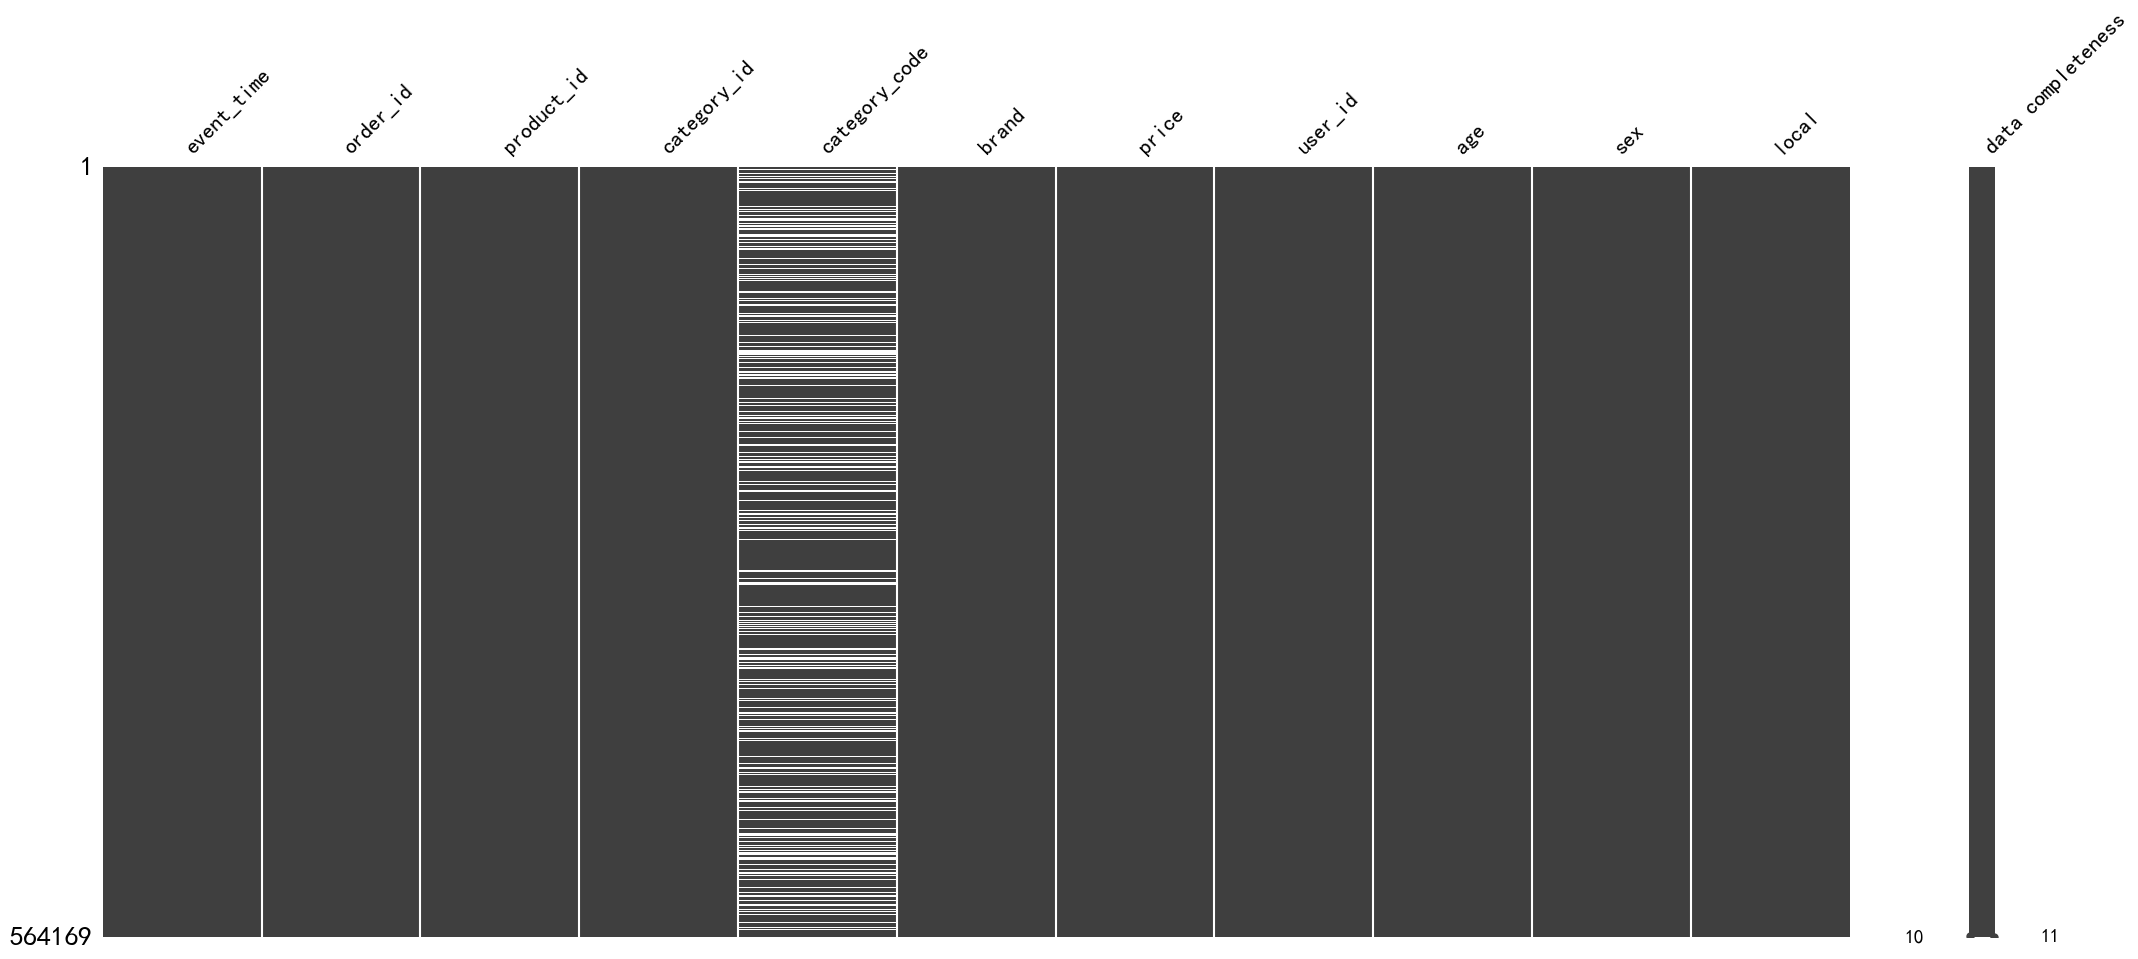

In [62]:
msno.matrix(df,labels=True)

In [63]:
df["order_id"].nunique()

234232

In [64]:
df["category_id"].nunique()

829

In [65]:
df["brand"].nunique()

869

In [66]:
df["product_id"].nunique()

3756

数据预处理

In [67]:
df = df[df["price"] >0]

In [68]:
df.fillna("missing",inplace=True)

In [69]:
df["event_time"]

0         2020-04-24 11:50:39 UTC
1         2020-04-24 11:50:39 UTC
2         2020-04-24 14:37:43 UTC
3         2020-04-24 14:37:43 UTC
4         2020-04-24 19:16:21 UTC
                   ...           
564164    2020-11-21 10:10:01 UTC
564165    2020-11-21 10:10:13 UTC
564166    2020-11-21 10:10:30 UTC
564167    2020-11-21 10:10:30 UTC
564168    2020-11-21 10:10:30 UTC
Name: event_time, Length: 564130, dtype: object

In [70]:
df["event_time"] = df["event_time"].agg(lambda x: x[:-4])

In [71]:
df["event_time"] = pd.to_datetime(df["event_time"], format="%Y-%m-%d %H:%M:%S")

In [72]:
df["month"] = df["event_time"].dt.month
df['day'] = df['event_time'].dt.day
df['dayofweek'] = df['event_time'].dt.dayofweek
df['hour'] = df['event_time'].dt.hour

In [73]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,month,day,dayofweek,hour
0,2020-04-24 11:50:39,2294359932054530000,1515966223509080000,2268105426648170000,electronics.tablet,brand_1,162.01,1515915625441990000,24,女,海南,4,24,4,11
1,2020-04-24 11:50:39,2294359932054530000,1515966223509080000,2268105426648170000,electronics.tablet,brand_1,162.01,1515915625441990000,24,女,海南,4,24,4,11
2,2020-04-24 14:37:43,2294444024058080000,2273948319057180000,2268105430162990000,electronics.audio.headphone,brand_2,77.52,1515915625447870000,38,女,北京,4,24,4,14
3,2020-04-24 14:37:43,2294444024058080000,2273948319057180000,2268105430162990000,electronics.audio.headphone,brand_2,77.52,1515915625447870000,38,女,北京,4,24,4,14
4,2020-04-24 19:16:21,2294584263154070000,2273948316817420000,2268105471367840000,missing,brand_3,217.57,1515915625443140000,32,女,广东,4,24,4,19


整体销售趋势分析

1.每月销售金额

In [74]:
sale_by_month = df.groupby("month")["price"].sum()
sale_by_month

month
1      1953358.17
2      2267809.88
3      2897486.26
4      1704422.41
5      7768637.79
6      7691244.33
7     16354029.27
8     27982605.44
9     17152310.57
10    19765680.76
11    11961511.52
Name: price, dtype: float64

In [75]:
fig = px.line(sale_by_month.reset_index(),x="month",y="price")
fig.update_layout(title_text="每月销售金额")
fig.show()

In [76]:
fig=px.scatter(sale_by_month,y="price",size="price")
fig.update_layout(title_text="每月销售金额")
fig.show()

2.月订单量的变化

In [77]:
order_by_month = df.groupby("month")["order_id"].nunique()
order_by_month

month
1     10353
2     11461
3     12080
4      9001
5     30460
6     28978
7     57659
8     73897
9       345
10       14
11        6
Name: order_id, dtype: int64

In [78]:
fig = px.line(order_by_month.reset_index(),x="month",y="order_id")
fig.update_layout(title_text="每月成交量")
fig.show()

In [79]:
fig=px.scatter(order_by_month,y="order_id",size="order_id")
fig.update_layout(title_text="每月成交量")
fig.show()

3.月消费人数/人次变化

In [80]:
people_by_month = df.groupby("month")["user_id"].agg(["nunique","count"])
people_by_month

,nunique,count
month,,
1,1388,15575
2,1508,17990
3,1597,18687
4,1525,11867
5,3168,40332
6,3966,41355
7,5159,76415
8,6213,100006
9,5497,70496


In [81]:
fig = px.line(people_by_month.reset_index(),x="month",y="nunique")
fig.update_layout(title_text="每月人数")
fig.show()

In [82]:
fig = px.line(people_by_month.reset_index(),x="month",y="count")
fig.update_layout(title_text="每月人次")
fig.show()

4.每月客单价

In [83]:
sale_by_month=sale_by_month.reset_index()
sale_by_month

,month,price
0,1,1953358.17
1,2,2267809.88
2,3,2897486.26
3,4,1704422.41
4,5,7768637.79
5,6,7691244.33
6,7,16354029.27
7,8,27982605.44
8,9,17152310.57
9,10,19765680.76


In [84]:
order_by_month = order_by_month.reset_index()
order_by_month

,month,order_id
0,1,10353
1,2,11461
2,3,12080
3,4,9001
4,5,30460
5,6,28978
6,7,57659
7,8,73897
8,9,345
9,10,14


In [85]:
customer_transaction_by_month = pd.merge(sale_by_month,order_by_month)
customer_transaction_by_month

,month,price,order_id
0,1,1953358.17,10353
1,2,2267809.88,11461
2,3,2897486.26,12080
3,4,1704422.41,9001
4,5,7768637.79,30460
5,6,7691244.33,28978
6,7,16354029.27,57659
7,8,27982605.44,73897
8,9,17152310.57,345
9,10,19765680.76,14


In [86]:
customer_transaction_by_month["average"]=customer_transaction_by_month["price"]/customer_transaction_by_month["order_id"]
customer_transaction_by_month

,month,price,order_id,average
0,1,1953358.17,10353,1.886756e+02
1,2,2267809.88,11461,1.978719e+02
2,3,2897486.26,12080,2.398581e+02
3,4,1704422.41,9001,1.893592e+02
4,5,7768637.79,30460,2.550439e+02
5,6,7691244.33,28978,2.654167e+02
6,7,16354029.27,57659,2.836336e+02
7,8,27982605.44,73897,3.786704e+02
8,9,17152310.57,345,4.971684e+04
9,10,19765680.76,14,1.411834e+06


In [87]:
fig = px.line(customer_transaction_by_month,x="month",y="average")
fig.update_layout(title_text="每月客单价")
fig.show()

5.每个订单中包含的产品数量

In [88]:
order_contain_product = df.groupby("order_id")["product_id"].count().reset_index().sort_values("product_id",ascending=False)
order_contain_product


,order_id,product_id
234208,2388440981134640000,15021
234210,2388440981134660000,14891
234211,2388440981134670000,14845
234212,2388440981134680000,14765
234202,2388440981134580000,14587
...,...,...
110592,2354509954271930000,1
110593,2354509954364210000,1
110594,2354509954515200000,1
110595,2354509954615870000,1


In [89]:
fig=px.bar(order_contain_product[:20],x="order_id",y="product_id")
fig.update_layout(title_text="每个订单中包含产品数量")
fig.show()

6.不同省份的订单量、用户量和消费金额对比

In [90]:
diff_by_local = df.groupby("local").agg({"order_id":"nunique","user_id":"nunique","price":sum}).reset_index().sort_values("price",ascending=False)
diff_by_local

,local,order_id,user_id,price
4,广东,51471,6085,26013770.86
0,上海,39354,5680,19837942.20
1,北京,38118,5702,19137748.75
9,湖南,13879,3481,6983078.88
7,海南,13076,3587,6968674.41
2,四川,13396,3589,6770891.28
6,浙江,12790,3485,6522657.59
10,重庆,13058,3496,6479488.14
3,天津,13058,3497,6433736.85
5,江苏,13575,3598,6357286.87


In [91]:
fig = px.pie(
    diff_by_local,labels="local",values="price",names="local"
)
fig.update_traces(
    textinfo="percent+label"
)
fig.show()

In [92]:
fig = px.bar(diff_by_local,x="local",y="price")
fig.show()

7.不同省份对品牌的喜爱程度

In [93]:
brand_by_local = df.groupby(["local","brand"]).size().to_frame().reset_index()
brand_by_local

,local,brand,0
0,上海,brand_1,16372
1,上海,brand_10,1538
2,上海,brand_100,1215
3,上海,brand_101,276
4,上海,brand_102,13
...,...,...,...
5948,重庆,brand_95,11
5949,重庆,brand_96,6
5950,重庆,brand_97,12
5951,重庆,brand_98,126


In [94]:
brand_by_local.columns=["local","brand","number"]
brand_by_local

,local,brand,number
0,上海,brand_1,16372
1,上海,brand_10,1538
2,上海,brand_100,1215
3,上海,brand_101,276
4,上海,brand_102,13
...,...,...,...
5948,重庆,brand_95,11
5949,重庆,brand_96,6
5950,重庆,brand_97,12
5951,重庆,brand_98,126


In [95]:
brand_by_local.sort_values(["local","number"],ascending=[True,False],inplace=True,ignore_index=True)

In [96]:
brand_by_local = brand_by_local[brand_by_local["brand"] != "missing"]
brand_by_local

,local,brand,number
0,上海,brand_1,16372
1,上海,brand_5,5888
2,上海,brand_11,4568
3,上海,brand_17,4304
4,上海,brand_15,3108
...,...,...,...
5948,重庆,brand_813,1
5949,重庆,brand_826,1
5950,重庆,brand_837,1
5951,重庆,brand_847,1


In [97]:
brand_by_local=brand_by_local.groupby("local").head(3)
brand_by_local

,local,brand,number
0,上海,brand_1,16372
1,上海,brand_5,5888
2,上海,brand_11,4568
644,北京,brand_1,15732
645,北京,brand_5,5914
646,北京,brand_11,4506
1291,四川,brand_1,5860
1292,四川,brand_5,2016
1293,四川,brand_11,1725
1783,天津,brand_1,5013


In [101]:
fig=px.bar(brand_by_local,x="brand",
             y="number",facet_col="local")
fig.update_layout(width=1000)
fig.show()

8.下单时间分析

In [103]:
order_time=df.groupby("dayofweek")["order_id"].nunique().reset_index()
order_time

,dayofweek,order_id
0,0,35690
1,1,34256
2,2,31249
3,3,31555
4,4,33010
5,5,34772
6,6,33922


In [105]:
fig=px.bar(order_time,x="dayofweek",y="order_id")
fig.update_layout(title_text="一周销量统计")
fig.show()

9.每小时订单量分析

In [106]:
order_by_hour=df.groupby("hour")["order_id"].nunique().reset_index()
order_by_hour

,hour,order_id
0,0,2865
1,1,2711
2,2,3981
3,3,6968
4,4,12176
5,5,16411
6,6,18667
7,7,20034
8,8,20261
9,9,20507


In [107]:
fig = px.line(order_by_hour,x="hour",y="order_id")
fig.update_layout(title_text="每小时订单量")
fig.show()

10.用户消费次数及消费金额

In [109]:
users = df.groupby("user_id").agg({"order_id":"nunique", "price":sum}).reset_index()
users

,user_id,order_id,price
0,1515915625439950000,1,416.64
1,1515915625440030000,2,56.43
2,1515915625440050000,3,7530.34
3,1515915625440090000,15,5074.47
4,1515915625440120000,2,182.83
...,...,...,...
6903,1515915625514850000,1,6241.64
6904,1515915625514860000,1,3572.18
6905,1515915625514870000,1,7375.92
6906,1515915625514880000,1,8770.02


In [110]:
fig = px.scatter(users,
                x="order_id",
                y="price",
                color="price",
                size="price")

fig.show()

11.用户消费周期

In [112]:
df['event_time']

0        2020-04-24 11:50:39
1        2020-04-24 11:50:39
2        2020-04-24 14:37:43
3        2020-04-24 14:37:43
4        2020-04-24 19:16:21
                 ...        
564164   2020-11-21 10:10:01
564165   2020-11-21 10:10:13
564166   2020-11-21 10:10:30
564167   2020-11-21 10:10:30
564168   2020-11-21 10:10:30
Name: event_time, Length: 564130, dtype: datetime64[ns]

In [114]:
purchase_time=df.groupby('user_id').apply(lambda x: x['event_time'] - x['event_time'].shift()).dt.days
purchase_time

user_id                    
1515915625439950000  96014      NaN
1515915625440030000  374760     NaN
                     484927    35.0
1515915625440050000  463812     NaN
                     473430     1.0
                               ... 
1515915625514880000  564132     0.0
                     564143     0.0
                     564164     0.0
1515915625514890000  564158     NaN
                     564165     0.0
Name: event_time, Length: 564130, dtype: float64

In [115]:
purchase_time[purchase_time>0].describe()

count    120629.000000
mean         35.494500
std         663.803583
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       18466.000000
Name: event_time, dtype: float64

1. 有75%的客户消费周期在12天

12.用户复购行为分析

In [116]:
pivoted_counts = df.pivot_table(index='user_id',
               columns='month',
               values='order_id',
               aggfunc='nunique').fillna(0)

pivoted_counts

month,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1515915625439950000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1515915625440030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1515915625440050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1515915625440090000,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,2.0,5.0,2.0
1515915625440120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1515915625514850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1515915625514860000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1515915625514870000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
columns_month = df['month'].sort_values().astype('str').unique()
columns_month

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
      dtype=object)

In [120]:
pivoted_counts_map = pivoted_counts.applymap(lambda x: 1 if x >1 else np.NaN if x == 0 else 0)
pivoted_counts_map

month,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1515915625439950000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1515915625440030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1515915625440050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1515915625440090000,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,1.0,1.0,1.0
1515915625440120000,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1515915625514850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1515915625514860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1515915625514870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [126]:
re_buy = pivoted_counts_map.sum() / pivoted_counts_map.count()
re_buy = re_buy.reset_index()
re_buy.columns = ["month","re_buy_rate"]
re_buy

,month,re_buy_rate
0,1,0.406340
1,2,0.439655
2,3,0.474640
3,4,0.700328
4,5,0.829861
5,6,0.792990
6,7,0.891452
7,8,0.920328
8,9,0.781153
9,10,0.609963


In [130]:
fig=px.line(re_buy,x="month",y="re_buy_rate")
fig.update_layout(width=700,title_text="复购率")
fig.show()